In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from pandas_profiling.model.base import Variable
%matplotlib inline

In [0]:
# prevent warnings messages
import warnings
warnings.filterwarnings("ignore")

In [0]:
# provide path to datasets
TRAIN = 'heart_train.csv'
TEST = 'heart_test.csv'

In [4]:
# 1.download datasets with wget
!wget -O {TRAIN} http://ps2.railsreactor.net/datasets/medicine/heart_train.csv
!wget -O {TEST} http://ps2.railsreactor.net/datasets/medicine/heart_test.csv

--2019-07-20 23:58:11--  http://ps2.railsreactor.net/datasets/medicine/heart_train.csv
Resolving ps2.railsreactor.net (ps2.railsreactor.net)... 65.19.181.123
Connecting to ps2.railsreactor.net (ps2.railsreactor.net)|65.19.181.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9027 (8.8K) [application/octet-stream]
Saving to: ‘heart_train.csv’

heart_train.csv     100%[===================>]   8.82K  --.-KB/s    in 0s      

2019-07-20 23:58:11 (107 MB/s) - ‘heart_train.csv’ saved [9027/9027]

--2019-07-20 23:58:13--  http://ps2.railsreactor.net/datasets/medicine/heart_test.csv
Resolving ps2.railsreactor.net (ps2.railsreactor.net)... 65.19.181.123
Connecting to ps2.railsreactor.net (ps2.railsreactor.net)|65.19.181.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2334 (2.3K) [application/octet-stream]
Saving to: ‘heart_test.csv’

heart_test.csv      100%[===================>]   2.28K  --.-KB/s    in 0s      

2019-07-20 23:58:13 (321 M

In [0]:
# 2.load and concatenate train and test datasets
df = pd.concat([pd.read_csv(TRAIN),pd.read_csv(TEST)]).reset_index()\
    .drop(labels=['index'], axis=1)

In [6]:
#3
print('dataset shape (rows, columns):', df.shape)
df.head()

dataset shape (rows, columns): (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [0]:
report = df.profile_report(title='Profiling Report on heart datasets')

In [8]:
#4
dtypes_set = report.description_set['variables']
numerical_feats, categorical_feats, boolean_feats = [], [], []
for k in dtypes_set.keys():
    v_type = dtypes_set[k]['type']
    if v_type == Variable.TYPE_NUM:
        numerical_feats.append(k)
    elif v_type == Variable.TYPE_CAT:
        categorical_feats.append(k)
    elif v_type == Variable.TYPE_BOOL:
        boolean_feats.append(k)

categorical_feats.append(numerical_feats[1])
numerical_feats = numerical_feats[:1] + numerical_feats[2:]
boolean_feats = boolean_feats[:-1]
print('Features divided by their types:')
print(f'\t Numerical : {numerical_feats}')
print(f'\t Categorical: {categorical_feats}')
print(f'\t Boolean: {boolean_feats}')

Features divided by their types:
	 Numerical : ['age', 'chol', 'oldpeak', 'thalach', 'trestbps']
	 Categorical: ['cp', 'restecg', 'slope', 'thal', 'ca']
	 Boolean: ['exang', 'fbs', 'sex']


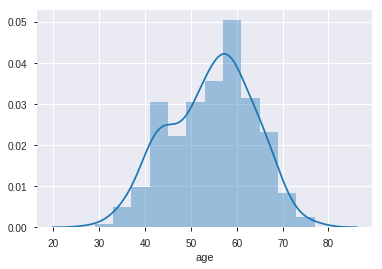

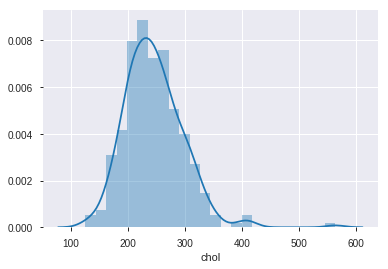

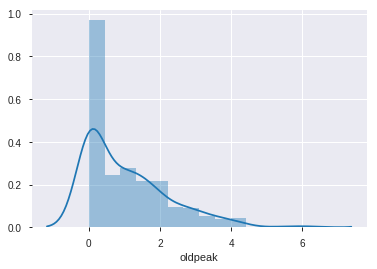

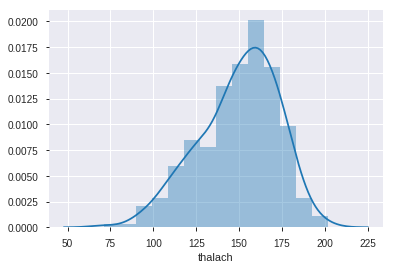

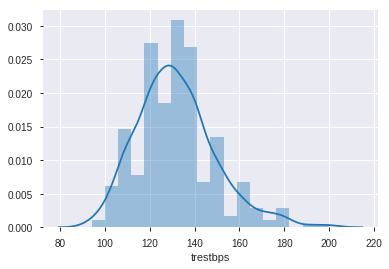

In [9]:
#5
for num_col in numerical_feats:
    plt.figure()
    sns.distplot(df[num_col])

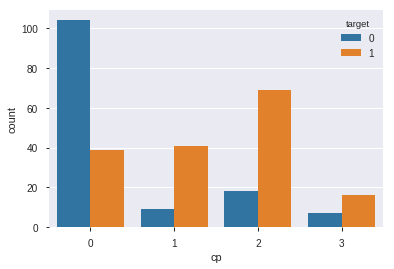

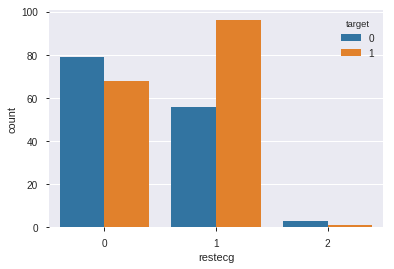

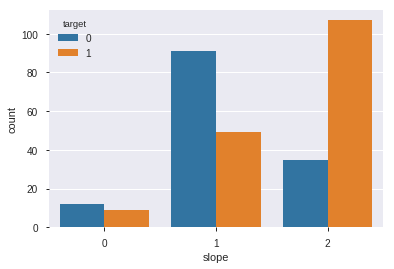

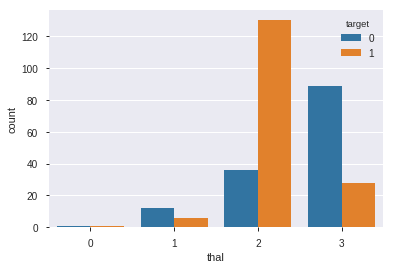

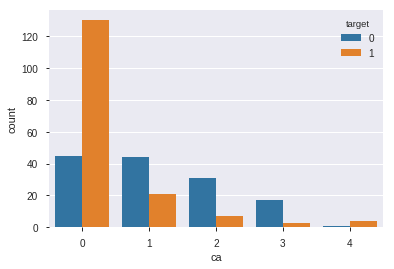

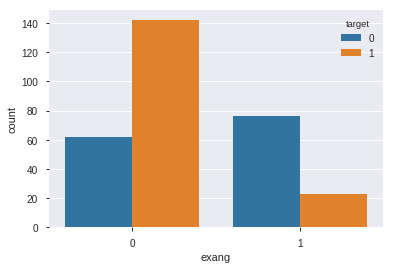

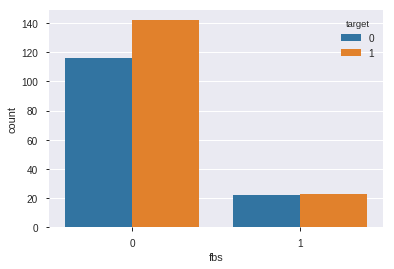

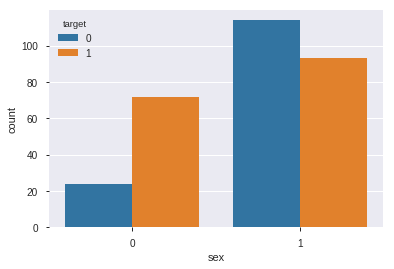

In [10]:
#6
for column in categorical_feats + boolean_feats:
    plt.figure()
    sns.countplot(column, data=df, hue='target')

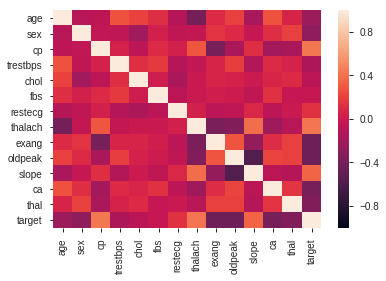

In [11]:
#7
sns.heatmap(df.corr(), vmin=-1, vmax=1)

In [0]:
#8
categorical_mask = []
numerical_mask = []
for col in df.columns.values[:-1]:
    if col in categorical_feats:
        categorical_mask.append(True)
    else:
        categorical_mask.append(False)
    if col in numerical_feats:
        numerical_mask.append(True)
    else:
        numerical_mask.append(False)

In [0]:
df['oldpeak'] = np.sqrt(df['oldpeak'])
X = df.values[:, :-1]
y = df.values[:, -1]
scaler = StandardScaler().fit(X[:, numerical_mask])
X[:, numerical_mask] = scaler.transform(X[:, numerical_mask])
X = OneHotEncoder(categorical_features=categorical_mask, sparse=False).fit_transform(X)

In [14]:
#9
report